In [17]:
%load_ext autoreload
%autoreload 2


import numpy as np 
import pandas as pd 

from venn import venn


In [24]:
data = pd.read_csv('model_data.csv')
data.head()

,TBCA Oxota,OOH Oxota,Buy m.o. Oxota,Trial Oxota,Unaided Oxota,Consider T1 Oxota,OOH freq,Instore freq,Bar freq,Volume,Media coverage,WOM +ve,WOM =,Experience +ve,Experience =,Date
0,1,0,0,0,0,0,1088.184000,0.55,0,5.0,0,0,0,0,0,18042023
1,1,0,0,1,0,0,769.461000,1.80,0,4.0,0,0,0,0,1,18042023
2,0,0,0,1,0,0,312.480000,1.00,0,2.0,0,0,0,1,0,18042023
3,0,0,0,1,0,0,143.452286,3.00,0,0.5,0,0,0,0,1,18042023
4,1,0,0,0,0,0,227.211429,0.50,0,1.5,0,0,0,0,0,18042023


In [18]:
data.columns

Index(['TBCA Oxota', 'OOH Oxota', 'Buy m.o. Oxota', 'Trial Oxota',
       'Unaided Oxota', 'Consider T1 Oxota', 'OOH freq', 'Instore freq',
       'Bar freq', 'Volume', 'Media coverage', 'WOM +ve', 'WOM =',
       'Experience +ve', 'Experience ='],
      dtype='object')

# Venn 

In [10]:
list(data[data['OOH freq'] > 1].index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 34,
 35,
 37,
 38,
 39,
 40,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 55,
 56,
 57,
 59,
 60,
 62,
 64,
 66,
 67,
 68,
 69,
 73,
 74,
 75,
 77,
 78,
 80,
 81,
 83,
 84,
 87,
 88,
 89,
 90,
 91,
 93,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 128,
 130,
 131,
 132,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 153,
 156,
 158,
 161,
 162,
 166,
 167,
 169,
 170,
 172,
 173,
 174,
 176,
 179,
 180,
 181,
 182,
 183,
 188,
 189,
 190,
 191,
 192,
 194,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 218,
 219,
 220,
 221,
 222,
 225,
 226,
 227,
 229,
 231,
 232,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 245,
 247,
 248,
 249,
 250,
 251,
 253,
 254

In [14]:
venn_data = {
    'OOH': set(data[data['OOH freq'] > 1].index),
    'Instore': set(data[data['Instore freq'] > 1].index),
    'Bar ': set(data[data['Bar freq'] > 1].index),
}

<Axes: >

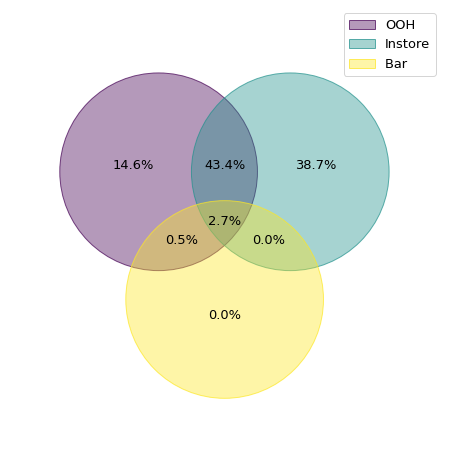

In [16]:
venn(venn_data, fmt="{percentage:.1f}%")

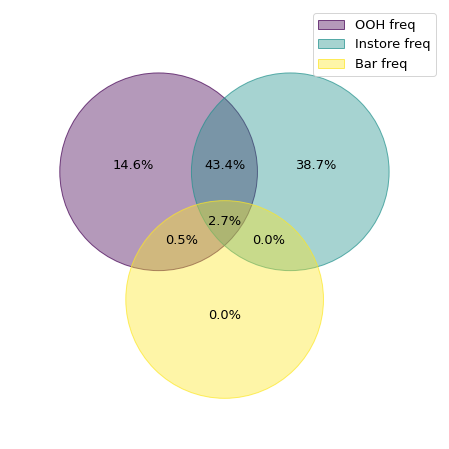

In [83]:
from Utils import VennForChannels

VennForChannels(data, ['OOH freq', 'Instore freq', 'Bar freq'], [1, 1, 1])

# Date

In [81]:
from datetime import datetime

data = pd.read_csv('model_data.csv')

data['Week'] = pd.to_datetime(data['Date'], format='%d%m%Y').dt.strftime('%Y-%V')

# clean
data.loc[((data['Week'] == '2023-23') | (data['Week'] == '2023-25')), 'Week'] = '2023-22'

data.head()

,TBCA Oxota,OOH Oxota,Buy m.o. Oxota,Trial Oxota,Unaided Oxota,Consider T1 Oxota,OOH freq,Instore freq,Bar freq,Volume,Media coverage,WOM +ve,WOM =,Experience +ve,Experience =,Date,Week
0,1,0,0,0,0,0,1088.184000,0.55,0,5.0,0,0,0,0,0,18042023,2023-16
1,1,0,0,1,0,0,769.461000,1.80,0,4.0,0,0,0,0,1,18042023,2023-16
2,0,0,0,1,0,0,312.480000,1.00,0,2.0,0,0,0,1,0,18042023,2023-16
3,0,0,0,1,0,0,143.452286,3.00,0,0.5,0,0,0,0,1,18042023,2023-16
4,1,0,0,0,0,0,227.211429,0.50,0,1.5,0,0,0,0,0,18042023,2023-16


<Axes: xlabel='Week'>

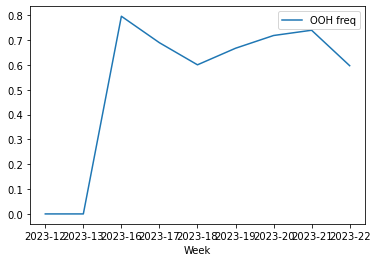

In [82]:
data[['Week', 'OOH freq']].groupby('Week').apply(lambda x: (x>=1).mean()).plot()

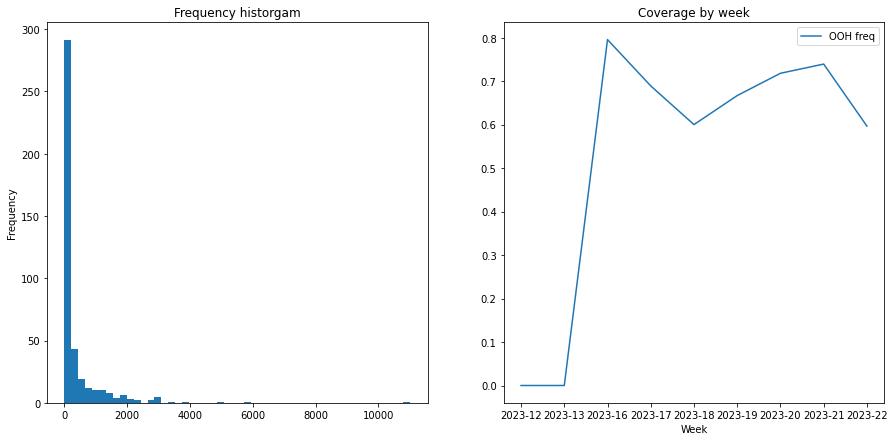

In [88]:
from Utils import ChannelReport, MediaReport

ChannelReport(data, 'OOH freq', 'Week')

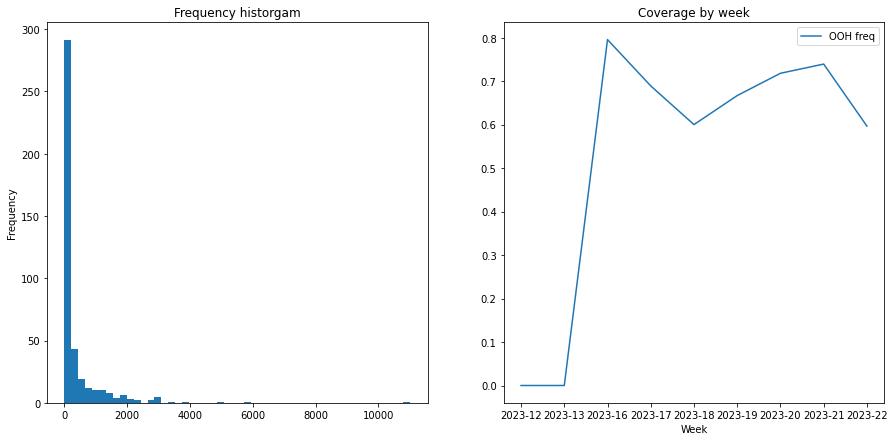

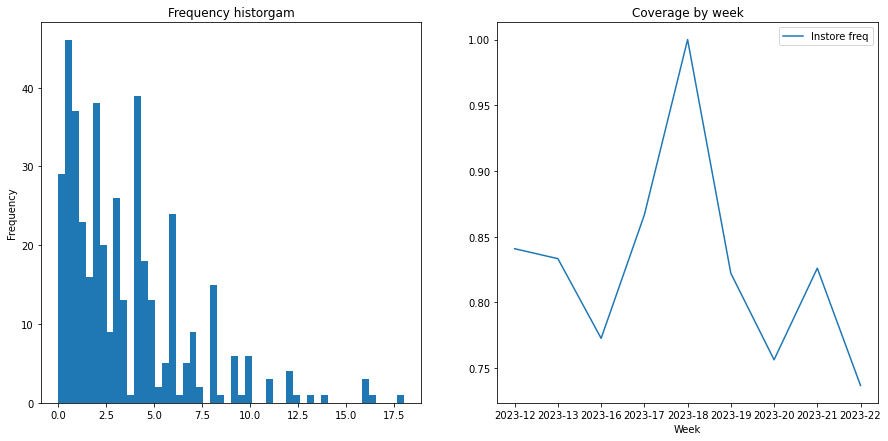

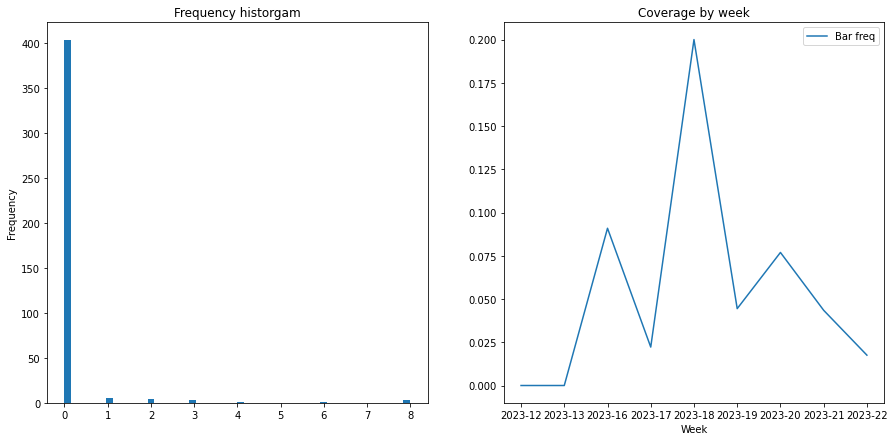

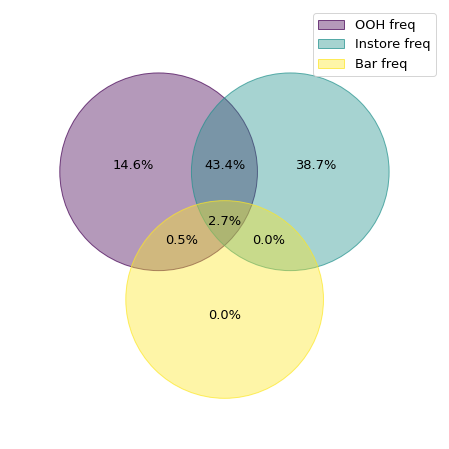

In [90]:
MediaReport(data, ['OOH freq', 'Instore freq', 'Bar freq'], 'Week')